> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a FBI GUN DATASET

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction for FBI GUN DATA BACKGROUND

The FBI gun data originally came from (FBI's National Instant Criminal Background Check System) and it was launched on November 30, 1998 under ACT of 1993. an important note; this data does not represent the actual number of sold guns based on some state laws. finally, the FBI is selling guns but it did not mention them publicly.

These data were collected to investigate how the market is selling the guns and if the customer are holding the authorization pass to buy them or not at each state in USA. however, in previous research, around 40% of the respondents had acquired their most recent firearm without going through a background check - without seeing their permit.

In this analytic code, we will deal with two different dataset during the preprocessing and exploration steps.

(GUN DATA), the dataset was collected in monthly-interval data from (11-1998) until (09-2017). for each month in this data it shows each state as following parameters:
       1-) Permit and permit recheck: both are showing how many customers were buying guns and holding authorization for that and at the same time some states were double-checking the permit.
       2-) the data has three different types of guns there were sold which are ( handgun, long gun, other types of the gun) also it used to show how much amount of there was sold in each state.
       3-) more data were having detailed description about the amount of each type of the guns there were { prepawn, redemption, returned, rentals, private sale, return to the seller.
       
> The following 3-question will be answered by the (GUN DATA) dataset, and they are as following:

      1# What census data is most associated with high gun per capita?
      2# Which states have had the highest growth in gun registrations?
      3# What is the overall trend of gun purchases?

Second, another dataset is named (US CENSUS DATA), this data shows brief information about the population of US citizens in each state. the data describe lots of details about the race of the citizens and whether they have a home or not in the USA and if there are from Africa or Asia or not ... etc. the description of the population was given in rows and the name of states was used in each column to gave the total number of there own population. 

this data will be used in the preprocessing steps only and will be taken benefit of it during the visualization steps.

## Library Package

In [1]:
import pandas as pd
import numpy as np


import matplotlib as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this Section will load the datasets and doing preprocessing for them.

### Import Data

In [50]:
#Uploading the df from csv and xlsx
gun_data_df = pd.read_excel ('gun_data.xlsx')
us_census_df = pd.read_csv ('U.S. Census Data.csv')

In [3]:
gun_data_df.head(5)

,month,state,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
0,2017-09,Alabama,16717.0,0.0,5734.0,6320.0,221.0,317,0.0,15.0,...,0.0,0.0,0.0,9.0,16.0,3.0,0.0,0.0,3.0,32019
1,2017-09,Alaska,209.0,2.0,2320.0,2930.0,219.0,160,0.0,5.0,...,0.0,0.0,0.0,17.0,24.0,1.0,0.0,0.0,0.0,6303
2,2017-09,Arizona,5069.0,382.0,11063.0,7946.0,920.0,631,0.0,13.0,...,0.0,0.0,0.0,38.0,12.0,2.0,0.0,0.0,0.0,28394
3,2017-09,Arkansas,2935.0,632.0,4347.0,6063.0,165.0,366,51.0,12.0,...,0.0,0.0,0.0,13.0,23.0,0.0,0.0,2.0,1.0,17747
4,2017-09,California,57839.0,0.0,37165.0,24581.0,2984.0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,123506


In [4]:
us_census_df.head(5)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,"Population estimates, July 1, 2016, (V2016)",NaN,"4,863,300","741,894","6,931,071","2,988,248","39,250,017","5,540,545","3,576,452","952,065",...,865454,6651194,"27,862,596","3,051,217","624,594","8,411,808","7,288,000","1,831,102","5,778,708","585,501"
1,"Population estimates base, April 1, 2010, (V2...",NaN,"4,780,131","710,249","6,392,301","2,916,025","37,254,522","5,029,324","3,574,114","897,936",...,814195,6346298,"25,146,100","2,763,888","625,741","8,001,041","6,724,545","1,853,011","5,687,289","563,767"
2,"Population, percent change - April 1, 2010 (es...",NaN,1.70%,4.50%,8.40%,2.50%,5.40%,10.20%,0.10%,6.00%,...,0.063,0.048,10.80%,10.40%,-0.20%,5.10%,8.40%,-1.20%,1.60%,3.90%
3,"Population, Census, April 1, 2010",NaN,"4,779,736","710,231","6,392,017","2,915,918","37,253,956","5,029,196","3,574,097","897,934",...,814180,6346105,"25,145,561","2,763,885","625,741","8,001,024","6,724,540","1,852,994","5,686,986","563,626"
4,"Persons under 5 years, percent, July 1, 2016, ...",NaN,6.00%,7.30%,6.30%,6.40%,6.30%,6.10%,5.20%,5.80%,...,0.071,0.061,7.20%,8.30%,4.90%,6.10%,6.20%,5.50%,5.80%,6.50%


## Preprossesing Data

>First, doing data assessment:

1) check on the shape of each dataset

In [5]:
#checking the shape for Gun df
gun_data_df.shape

(12485, 27)

In [6]:
#then shape for US census df
us_census_df.shape

(85, 52)

2) checking the types of each columns in the datasets

In [7]:
gun_data_df.dtypes

month                         object
state                         object
permit                       float64
permit_recheck               float64
handgun                      float64
long_gun                     float64
other                        float64
multiple                       int64
admin                        float64
prepawn_handgun              float64
prepawn_long_gun             float64
prepawn_other                float64
redemption_handgun           float64
redemption_long_gun          float64
redemption_other             float64
returned_handgun             float64
returned_long_gun            float64
returned_other               float64
rentals_handgun              float64
rentals_long_gun             float64
private_sale_handgun         float64
private_sale_long_gun        float64
private_sale_other           float64
return_to_seller_handgun     float64
return_to_seller_long_gun    float64
return_to_seller_other       float64
totals                         int64
d

In [8]:
us_census_df.dtypes

Fact              object
Fact Note         object
Alabama           object
Alaska            object
Arizona           object
Arkansas          object
California        object
Colorado          object
Connecticut       object
Delaware          object
Florida           object
Georgia           object
Hawaii            object
Idaho             object
Illinois          object
Indiana           object
Iowa              object
Kansas            object
Kentucky          object
Louisiana         object
Maine             object
Maryland          object
Massachusetts     object
Michigan          object
Minnesota         object
Mississippi       object
Missouri          object
Montana           object
Nebraska          object
Nevada            object
New Hampshire     object
New Jersey        object
New Mexico        object
New York          object
North Carolina    object
North Dakota      object
Ohio              object
Oklahoma          object
Oregon            object
Pennsylvania      object


3-) checking the NaN values

In [9]:
gun_data_df.isna().sum()

month                            0
state                            0
permit                          24
permit_recheck               11385
handgun                         20
long_gun                        19
other                         6985
multiple                         0
admin                           23
prepawn_handgun               1943
prepawn_long_gun              1945
prepawn_other                 7370
redemption_handgun            1940
redemption_long_gun           1941
redemption_other              7370
returned_handgun             10285
returned_long_gun            10340
returned_other               10670
rentals_handgun              11495
rentals_long_gun             11660
private_sale_handgun          9735
private_sale_long_gun         9735
private_sale_other            9735
return_to_seller_handgun     10010
return_to_seller_long_gun     9735
return_to_seller_other       10230
totals                           0
dtype: int64

In [10]:
us_census_df.isna().sum()

Fact               5
Fact Note         57
Alabama           20
Alaska            20
Arizona           20
Arkansas          20
California        20
Colorado          20
Connecticut       20
Delaware          20
Florida           20
Georgia           20
Hawaii            20
Idaho             20
Illinois          20
Indiana           20
Iowa              20
Kansas            20
Kentucky          20
Louisiana         20
Maine             20
Maryland          20
Massachusetts     20
Michigan          20
Minnesota         20
Mississippi       20
Missouri          20
Montana           20
Nebraska          20
Nevada            20
New Hampshire     20
New Jersey        20
New Mexico        20
New York          20
North Carolina    20
North Dakota      20
Ohio              20
Oklahoma          20
Oregon            20
Pennsylvania      20
Rhode Island      20
South Carolina    20
South Dakota      20
Tennessee         20
Texas             20
Utah              20
Vermont           20
Virginia     

4-) checking the unique values

In [11]:
gun_data_df.nunique()

month                          227
state                           55
permit                        5390
permit_recheck                 168
handgun                       7381
long_gun                      8350
other                         1226
multiple                      1387
admin                          499
prepawn_handgun                 90
prepawn_long_gun               133
prepawn_other                   16
redemption_handgun            1893
redemption_long_gun           2370
redemption_other                47
returned_handgun               237
returned_long_gun              113
returned_other                  34
rentals_handgun                  9
rentals_long_gun                 8
private_sale_handgun           152
private_sale_long_gun          136
private_sale_other              43
return_to_seller_handgun        17
return_to_seller_long_gun       17
return_to_seller_other           5
totals                       10218
dtype: int64

In [12]:
us_census_df.nunique()

Fact              80
Fact Note         15
Alabama           65
Alaska            64
Arizona           64
Arkansas          64
California        63
Colorado          64
Connecticut       63
Delaware          64
Florida           64
Georgia           64
Hawaii            63
Idaho             63
Illinois          65
Indiana           63
Iowa              65
Kansas            65
Kentucky          65
Louisiana         65
Maine             64
Maryland          64
Massachusetts     65
Michigan          64
Minnesota         65
Mississippi       65
Missouri          64
Montana           65
Nebraska          65
Nevada            63
New Hampshire     65
New Jersey        65
New Mexico        64
New York          65
North Carolina    65
North Dakota      63
Ohio              64
Oklahoma          64
Oregon            63
Pennsylvania      65
Rhode Island      64
South Carolina    65
South Dakota      65
Tennessee         64
Texas             64
Utah              64
Vermont           63
Virginia     

5-) Estimate the dataset through the standard error

In [13]:
gun_data_df.describe()

,permit,permit_recheck,handgun,long_gun,other,multiple,admin,prepawn_handgun,prepawn_long_gun,prepawn_other,...,returned_other,rentals_handgun,rentals_long_gun,private_sale_handgun,private_sale_long_gun,private_sale_other,return_to_seller_handgun,return_to_seller_long_gun,return_to_seller_other,totals
count,12461.000000,1100.000000,12465.000000,12466.000000,5500.000000,12485.000000,12462.000000,10542.000000,10540.000000,5115.000000,...,1815.000000,990.000000,825.000000,2750.000000,2750.000000,2750.000000,2475.000000,2750.000000,2255.000000,12485.000000
mean,6413.629404,1165.956364,5940.881107,7810.847585,360.471636,268.603364,58.898090,4.828021,7.834156,0.165591,...,1.027548,0.076768,0.087273,14.936000,11.602909,1.030182,0.402020,0.441818,0.105987,21595.725911
std,23752.338269,9224.200609,8618.584060,9309.846140,1349.478273,783.185073,604.814818,10.907756,16.468028,1.057105,...,4.386296,0.634503,0.671649,71.216021,54.253090,4.467843,1.446568,1.528223,0.427363,32591.418387
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,865.000000,2078.250000,17.000000,15.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4638.000000
50%,518.000000,0.000000,3059.000000,5122.000000,121.000000,125.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12399.000000
75%,4272.000000,0.000000,7280.000000,10380.750000,354.000000,301.000000,0.000000,5.000000,8.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,4.000000,0.000000,0.000000,0.000000,0.000000,25453.000000
max,522188.000000,116681.000000,107224.000000,108058.000000,77929.000000,38907.000000,28083.000000,164.000000,269.000000,49.000000,...,64.000000,12.000000,12.000000,1017.000000,777.000000,71.000000,28.000000,17.000000,4.000000,541978.000000


In [14]:
us_census_df.describe()

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,80,28,65,65,65,65,65,65,65,65,...,65,65,65,65,65,65,65,65,65,65
unique,80,15,65,64,64,64,63,64,63,64,...,65,64,64,64,63,65,65,64,65,64
top,"Total annual payroll, 2015 ($1,000)",(c),"322,025",7.30%,50.30%,50.90%,6.80%,3.30%,0.10%,51.60%,...,0.073,0.048,50.40%,2.50%,"625,741","3,364,939","14,297,278",1.50%,27.80%,7.10%
freq,1,6,1,2,2,2,2,2,2,2,...,1,2,2,2,2,1,1,2,1,2


### Assessment Comments

From the Following assessment it clearly show that the both data side is having the following issues:


   1-) the GUN DATASET having missing dataset almost every columns except (month, state, multiple, totals)
   
   2-) for unique values it was quite huge number of it so it is quite hard to remove them all.
   
   3-) some columns shows that there are ZERO values (also the DESCRIBE function show it in MIN row too)..., it is normal because its under columns like describe the type of guns and if this gun were returned or not ...etc.
   
   
 
   4-) for US CENSUS dataset, is represented in object not numerical type so it need to change the type from string to float
   
   5-) the 'Fact Note' columns are separating some data differently in rows which caused the DESCRIBE function to read it differently.
   
   6-) there are lots of Nan values - as shown in the below function - in alots of other columns, caused from how the data were categorized in rows more than in cloumns.


In [15]:
us_census_df.tail(3) #related to comment(6)

,Fact,Fact Note,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
82,S,Suppressed; does not meet publication standards,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,X,Not applicable,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,Z,Value greater than zero but less than half uni...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


>Second, Cleaning the Data

In [16]:
#take copy first

gun_clean_df = gun_data_df.copy()
census_clean_df = us_census_df.copy()

will low case letter for columns in US census df and column named State in Gun df.

References:

1- https://stackoverflow.com/questions/54808488/modify-strings-in-pandas-dataframe-column

2-https://stackoverflow.com/questions/11346283/renaming-columns-in-pandas

In [17]:
#will keep the Nan values for now

census_clean_df.rename(columns = lambda x: x.lower(), inplace = True)

gun_clean_df['state'] = gun_clean_df['state'].apply(lambda x: x.lower().strip() if isinstance(x, str) else x)

In [18]:
census_clean_df.head(0)

,fact,fact note,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming


In [19]:
gun_clean_df['state']

0              alabama
1               alaska
2              arizona
3             arkansas
4           california
             ...      
12480         virginia
12481       washington
12482    west virginia
12483        wisconsin
12484          wyoming
Name: state, Length: 12485, dtype: object

>The US Census df will not be fully used, the following index will be extracted from the data for more exploration analysis:
    (Men-owned firms, 2012
    , Women-owned firms, 2012). Then from gun df the following columns will be extracted: (month, state, permit, handgun,longgun, other)

The US CENSUS DF

In [20]:
#first drop fact note

census_clean_df = census_clean_df.drop(columns="fact note")
census_clean_df.head(0)

,fact,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming


In [21]:
#extract the index from us df
#reference: https://datatofish.com/select-rows-pandas-dataframe/

us_df = census_clean_df.loc[(census_clean_df['fact'] == 'Men-owned firms, 2012')
                            |(census_clean_df['fact'] == 'Women-owned firms, 2012')].set_index('fact')
us_df

,alabama,alaska,arizona,arkansas,california,colorado,connecticut,delaware,florida,georgia,...,south dakota,tennessee,texas,utah,vermont,virginia,washington,west virginia,wisconsin,wyoming
fact,,,,,,,,,,,,,,,,,,,,,
"Men-owned firms, 2012","203,604","35,402","245,243","123,158","1,852,580","284,554","187,845","38,328","1,084,885","480,578",...,42418,302249,"1,251,696","132,163","41,270","353,012","262,650","63,112","236,252","30,039"
"Women-owned firms, 2012","137,630","22,141","182,425","75,962","1,320,085","194,508","106,678","23,964","807,817","376,506",...,23722,195694,"866,678","76,269","23,417","236,290","187,677","39,065","133,859","19,344"


In [22]:
#transpose us_df
#reference: https://note.nkmk.me/en/python-pandas-t-transpose/

us_df = us_df.T
us_df.head(4)

fact,"Men-owned firms, 2012","Women-owned firms, 2012"
alabama,"203,604","137,630"
alaska,"35,402","22,141"
arizona,"245,243","182,425"
arkansas,"123,158","75,962"


In [23]:
#get the index column as origin column
us_df['fact'] = us_df.index
us_df.head(5)

fact,"Men-owned firms, 2012","Women-owned firms, 2012",fact
alabama,"203,604","137,630",alabama
alaska,"35,402","22,141",alaska
arizona,"245,243","182,425",arizona
arkansas,"123,158","75,962",arkansas
california,"1,852,580","1,320,085",california


In [24]:
#rearrange and rename the columns
us_df = us_df[['fact', 'Men-owned firms, 2012', 'Women-owned firms, 2012']]
us_df = us_df.rename(columns = {'fact': 'states', 'Men-owned firms, 2012': 'men owner frims 2012'
                  , 'Women-owned firms, 2012': 'women owner frims 2012'}, inplace = False)
us_df.head(3)

fact,states,men owner frims 2012,women owner frims 2012
alabama,alabama,"203,604","137,630"
alaska,alaska,"35,402","22,141"
arizona,arizona,"245,243","182,425"


In [25]:
#remove the index name then reset the variabilities
us_df.columns.name = None
us_df = us_df.reset_index(drop=True)
us_df

,states,men owner frims 2012,women owner frims 2012
0,alabama,"203,604","137,630"
1,alaska,"35,402","22,141"
2,arizona,"245,243","182,425"
3,arkansas,"123,158","75,962"
4,california,"1,852,580","1,320,085"
5,colorado,"284,554","194,508"
6,connecticut,"187,845","106,678"
7,delaware,"38,328","23,964"
8,florida,"1,084,885","807,817"
9,georgia,"480,578","376,506"


In [26]:
us_df.dtypes

states                    object
men owner frims 2012      object
women owner frims 2012    object
dtype: object

> convert the type of the numerical columns from string to float

In [27]:
pick_column = list(us_df.iloc[:,1:].columns)
for p in pick_column:
    us_df[p] = us_df[p].str.extract('(\d+)').astype('int')

In [28]:
us_df.head(10)

,states,men owner frims 2012,women owner frims 2012
0,alabama,203,137
1,alaska,35,22
2,arizona,245,182
3,arkansas,123,75
4,california,1,1
5,colorado,284,194
6,connecticut,187,106
7,delaware,38,23
8,florida,1,807
9,georgia,480,376


In [29]:
us_df.dtypes

states                    object
men owner frims 2012       int32
women owner frims 2012     int32
dtype: object

Then GUN DF

In [30]:
#extract the columns names
gun_clean_df.columns

Index(['month', 'state', 'permit', 'permit_recheck', 'handgun', 'long_gun',
       'other', 'multiple', 'admin', 'prepawn_handgun', 'prepawn_long_gun',
       'prepawn_other', 'redemption_handgun', 'redemption_long_gun',
       'redemption_other', 'returned_handgun', 'returned_long_gun',
       'returned_other', 'rentals_handgun', 'rentals_long_gun',
       'private_sale_handgun', 'private_sale_long_gun', 'private_sale_other',
       'return_to_seller_handgun', 'return_to_seller_long_gun',
       'return_to_seller_other', 'totals'],
      dtype='object')

In [31]:
#create new df with the needed columns
gun_df = gun_clean_df[['month', 'state', 'permit', 'handgun', 'long_gun',
       'other', 'totals']].copy()
gun_df

,month,state,permit,handgun,long_gun,other,totals
0,2017-09,alabama,16717.0,5734.0,6320.0,221.0,32019
1,2017-09,alaska,209.0,2320.0,2930.0,219.0,6303
2,2017-09,arizona,5069.0,11063.0,7946.0,920.0,28394
3,2017-09,arkansas,2935.0,4347.0,6063.0,165.0,17747
4,2017-09,california,57839.0,37165.0,24581.0,2984.0,123506
...,...,...,...,...,...,...,...
12480,1998-11,virginia,0.0,14.0,2.0,NaN,24
12481,1998-11,washington,1.0,65.0,286.0,NaN,361
12482,1998-11,west virginia,3.0,149.0,251.0,NaN,408
12483,1998-11,wisconsin,0.0,25.0,214.0,NaN,241


In [32]:
us_df.isnull().sum()

states                    0
men owner frims 2012      0
women owner frims 2012    0
dtype: int64

array([[<AxesSubplot:title={'center':'men owner frims 2012'}>,
        <AxesSubplot:title={'center':'women owner frims 2012'}>]],
      dtype=object)

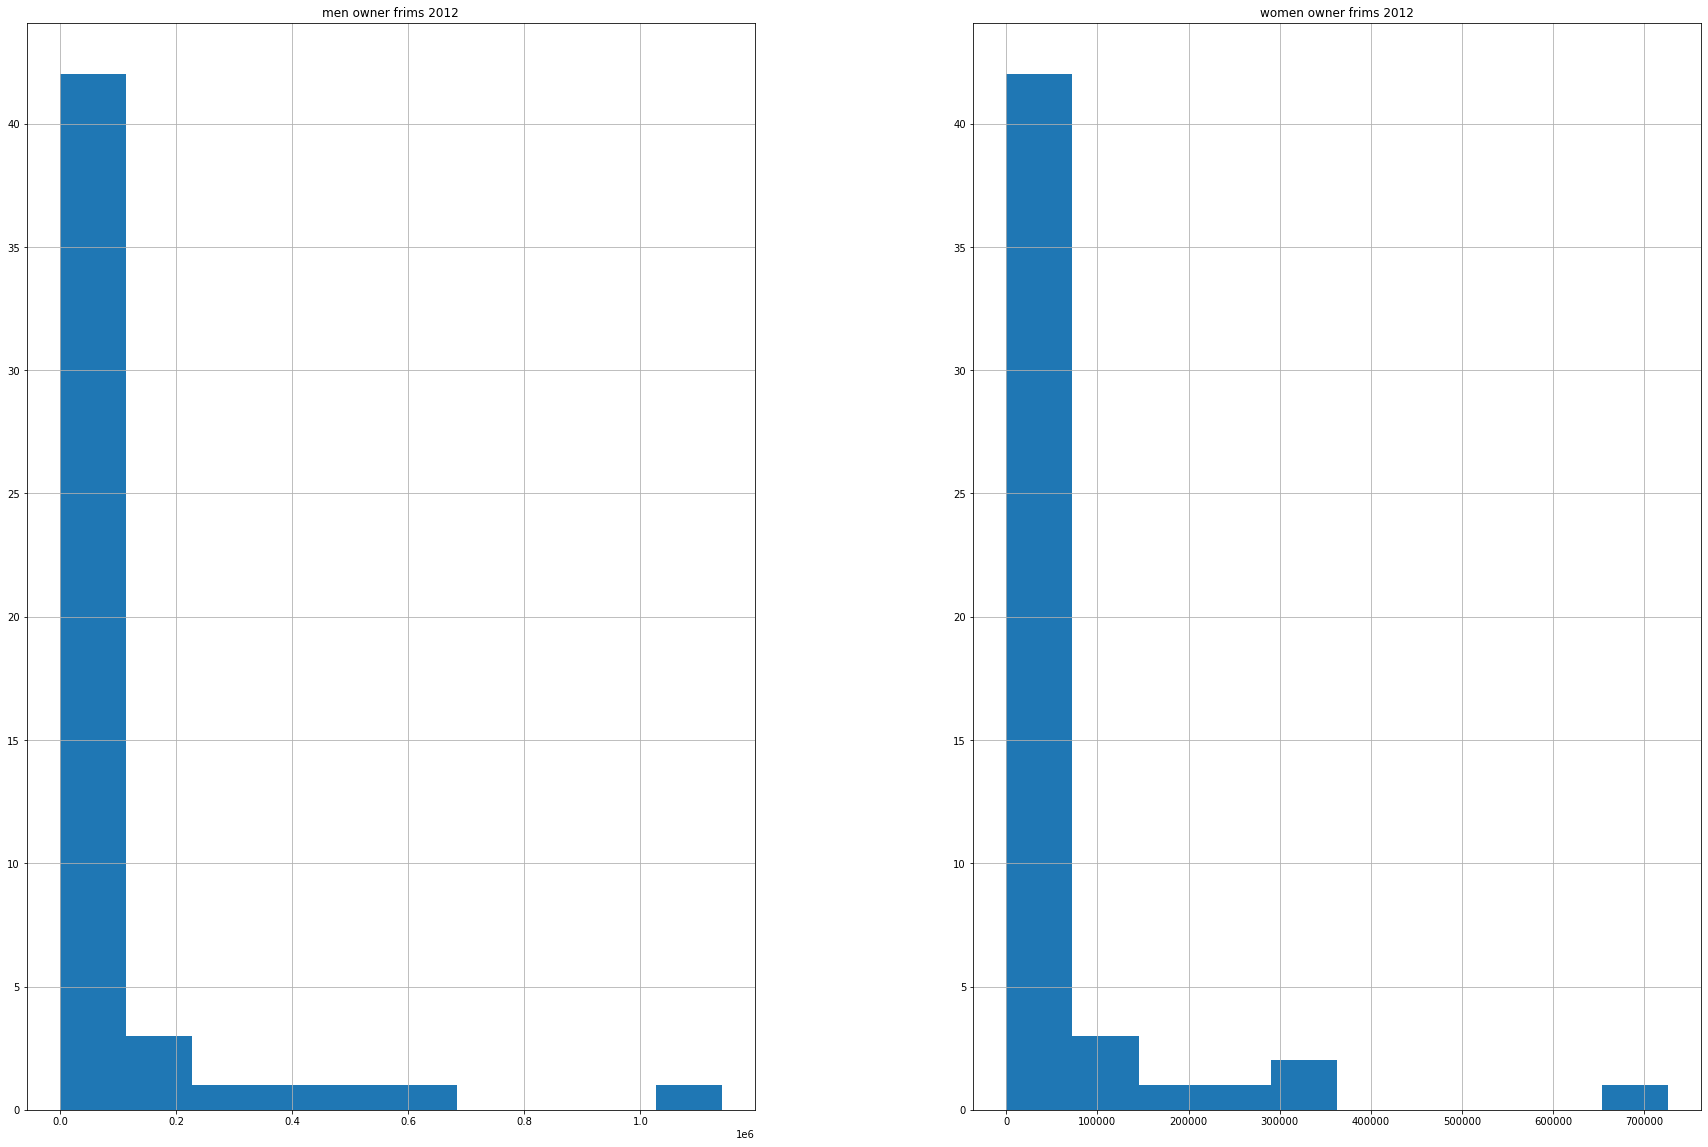

In [33]:
us_df.hist(figsize=(30, 20))

In [34]:
gun_df.isnull().sum()

month          0
state          0
permit        24
handgun       20
long_gun      19
other       6985
totals         0
dtype: int64

In [35]:
gun_df.shape

(12485, 7)

array([[<AxesSubplot:title={'center':'permit'}>,
        <AxesSubplot:title={'center':'handgun'}>],
       [<AxesSubplot:title={'center':'long_gun'}>,
        <AxesSubplot:title={'center':'other'}>],
       [<AxesSubplot:title={'center':'totals'}>, <AxesSubplot:>]],
      dtype=object)

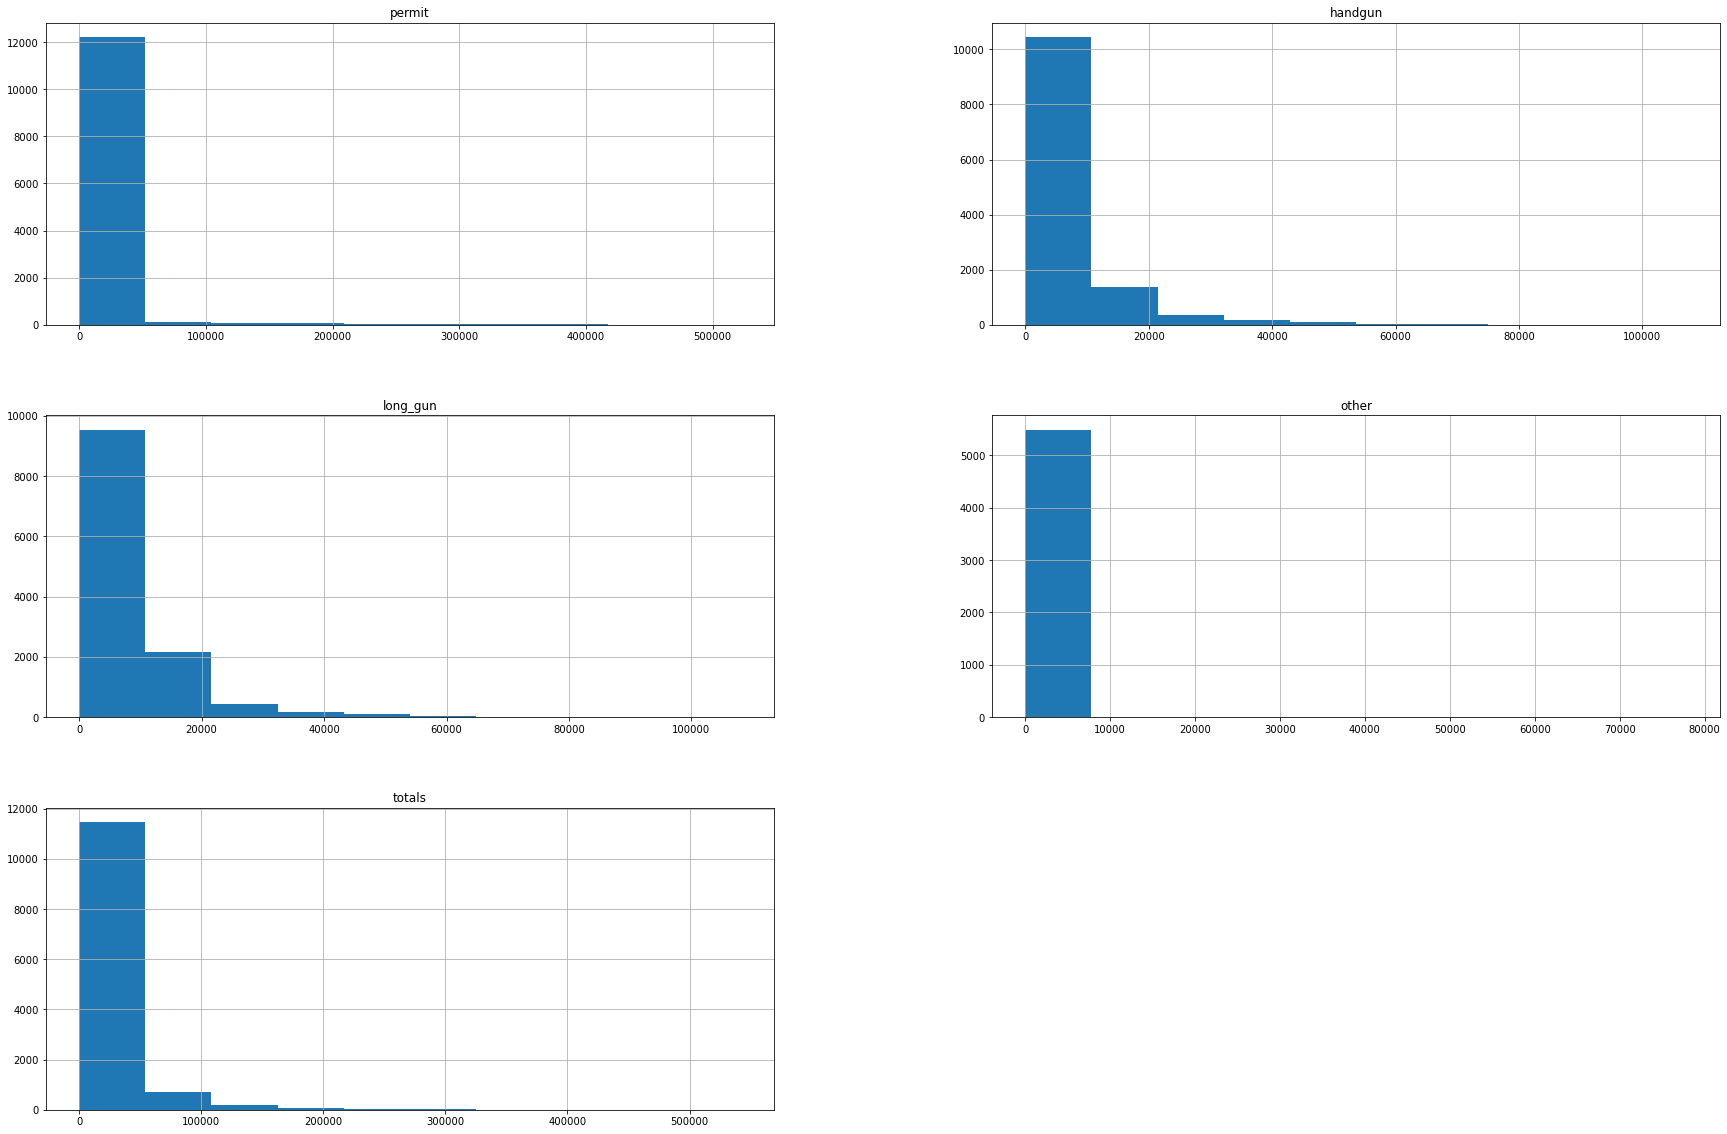

In [36]:
gun_df.hist(figsize=(30, 20))

> the histgram for US_DF show some zeros and it is normal as the data is focusing on the owners in each states


>the histgram for (Gun dataframe) were showing one side bar only for most of the figures, it might be because of the Nan values, if we tried to drop the Nan ROWS it will almost remove more than 50% of the origin data as shown in next function

In [37]:
#remove Nan values from rows part

gun_df.dropna(how='any', axis=0, inplace=True)

#checking the shape after the dropping
gun_df

,month,state,permit,handgun,long_gun,other,totals
0,2017-09,alabama,16717.0,5734.0,6320.0,221.0,32019
1,2017-09,alaska,209.0,2320.0,2930.0,219.0,6303
2,2017-09,arizona,5069.0,11063.0,7946.0,920.0,28394
3,2017-09,arkansas,2935.0,4347.0,6063.0,165.0,17747
4,2017-09,california,57839.0,37165.0,24581.0,2984.0,123506
...,...,...,...,...,...,...,...
5495,2009-06,virginia,0.0,9000.0,7836.0,0.0,17106
5496,2009-06,washington,6437.0,7632.0,7044.0,17.0,23229
5497,2009-06,west virginia,0.0,3231.0,3760.0,5.0,9232
5498,2009-06,wisconsin,0.0,4239.0,6027.0,5.0,10519


## Exploratory Data Analysis


### Research Question 1: What census data is most associated with high gun per capita?

> the GUN_DF is collecting data from 1998 until 2017 for each state about selling guns. So, will use it to exploratory each states and which one is the higher in selling guns. but first need to extract names of states from US_DF and keep it in list

In [38]:
#create list from us states names (its easier as the names is not repeated and will use this list for some plotting too)
state_names = list(us_df['states'])
state_names

['alabama',
 'alaska',
 'arizona',
 'arkansas',
 'california',
 'colorado',
 'connecticut',
 'delaware',
 'florida',
 'georgia',
 'hawaii',
 'idaho',
 'illinois',
 'indiana',
 'iowa',
 'kansas',
 'kentucky',
 'louisiana',
 'maine',
 'maryland',
 'massachusetts',
 'michigan',
 'minnesota',
 'mississippi',
 'missouri',
 'montana',
 'nebraska',
 'nevada',
 'new hampshire',
 'new jersey',
 'new mexico',
 'new york',
 'north carolina',
 'north dakota',
 'ohio',
 'oklahoma',
 'oregon',
 'pennsylvania',
 'rhode island',
 'south carolina',
 'south dakota',
 'tennessee',
 'texas',
 'utah',
 'vermont',
 'virginia',
 'washington',
 'west virginia',
 'wisconsin',
 'wyoming']

In [39]:
#returing back to GUN_DF , now sum the total columns according to each state
sumPerstate=[]
for state in state_names:
    sumPerstate.append((gun_df.loc[gun_df['state']==state])['totals'].sum())

Text(0, 0.5, 'Total Gun Number')

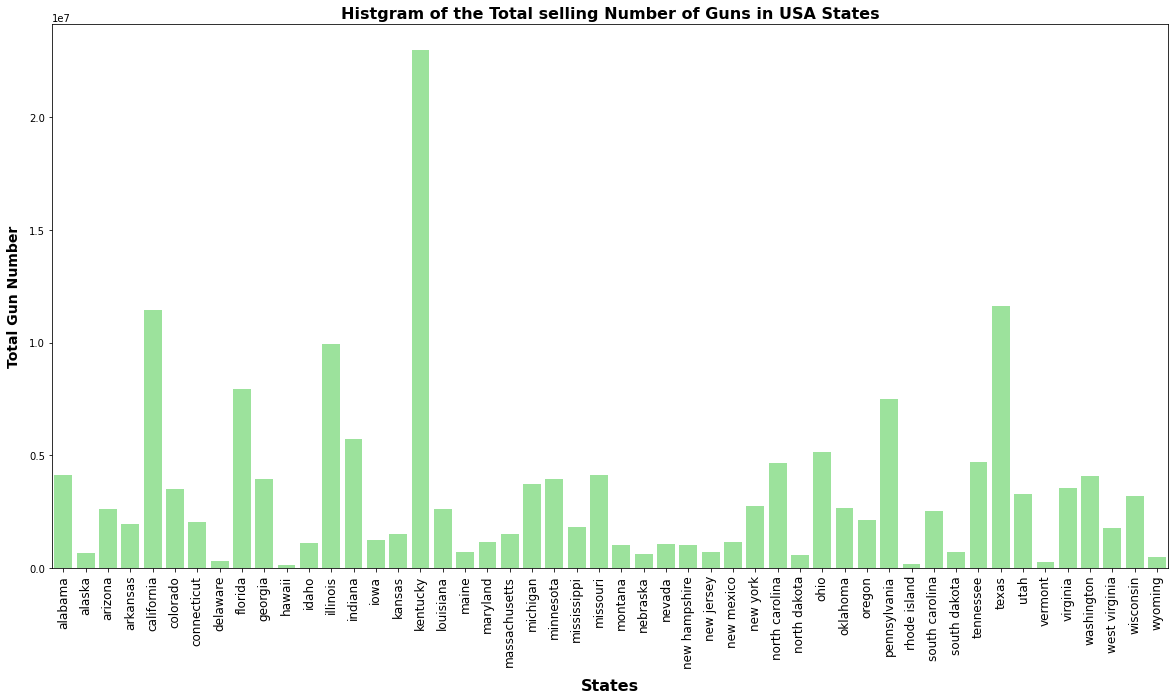

In [40]:
#ploting the state vs totals
plt.pyplot.figure(figsize=(20,10))
sns.barplot(x=state_names, y=sumPerstate, color = "lightgreen")
plt.pyplot.xticks(rotation=90, fontsize=12)

plt.pyplot.title('Histgram of the Total selling Number of Guns in USA States', fontweight='bold', fontsize=16)
plt.pyplot.xlabel('States', labelpad=10, fontweight='bold', fontsize=16)
plt.pyplot.ylabel('Total Gun Number', labelpad=8, fontweight='bold', fontsize=14)

>It shows that the KENTUCKY state having high gun selling and the second and third states are Taxes and California respectively.

### Research Question 2: Which states have had the highest growth in gun registrations?

> to answer this question, the PERMIT columns will be used from GUN_DF to check how many guns were selled and it was registrated.

In [41]:
#now sum the permit column according to the state
sumPermit=[]
for state in state_names:
    sumPermit.append((gun_df.loc[gun_df['state']==state])['permit'].sum())

Text(0, 0.5, 'Total Permit Number')

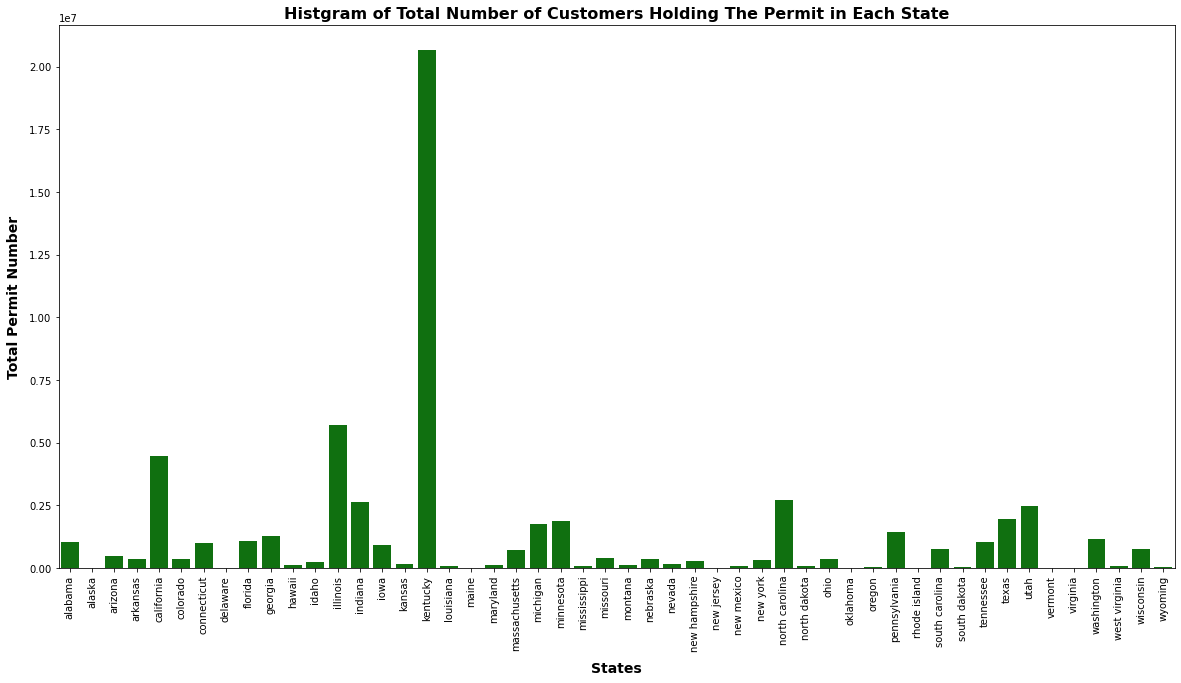

In [42]:
#ploting the state vs permit

plt.pyplot.figure(figsize=(20,10))
sns.barplot(x=state_names, y=sumPermit, color='green')
plt.pyplot.xticks(rotation=90)

plt.pyplot.title('Histgram of Total Number of Customers Holding The Permit in Each State', fontweight='bold', fontsize=16)
plt.pyplot.xlabel('States', labelpad=10, fontweight='bold', fontsize=14)
plt.pyplot.ylabel('Total Permit Number', labelpad=8, fontweight='bold', fontsize=14)

> still the KENTUCKY state considered as the highest one in getting registration for gun

### Research Question 3: What is the overall trend of gun purchases?

>there are three different types of guns in gun_df (handgun, long_gun, other), three of them will be plotted to investage which states are the highest and which guns are the most sold. additionaly, the US DF shows the owner of frims for Women and Men in 2012 according to each state in USA, this information can show the highest owner in each state regards to the gender.

In [43]:
#sum each type of gun accourding to each state

handgun=[]
longgun= []
other = []
for state in state_names:
    handgun.append((gun_df.loc[gun_df['state']==state])['handgun'].sum())
    longgun.append((gun_df.loc[gun_df['state']==state])['long_gun'].sum())
    other.append((gun_df.loc[gun_df['state']==state])['other'].sum())


Text(0, 0.5, 'Total Hand-Gun Number')

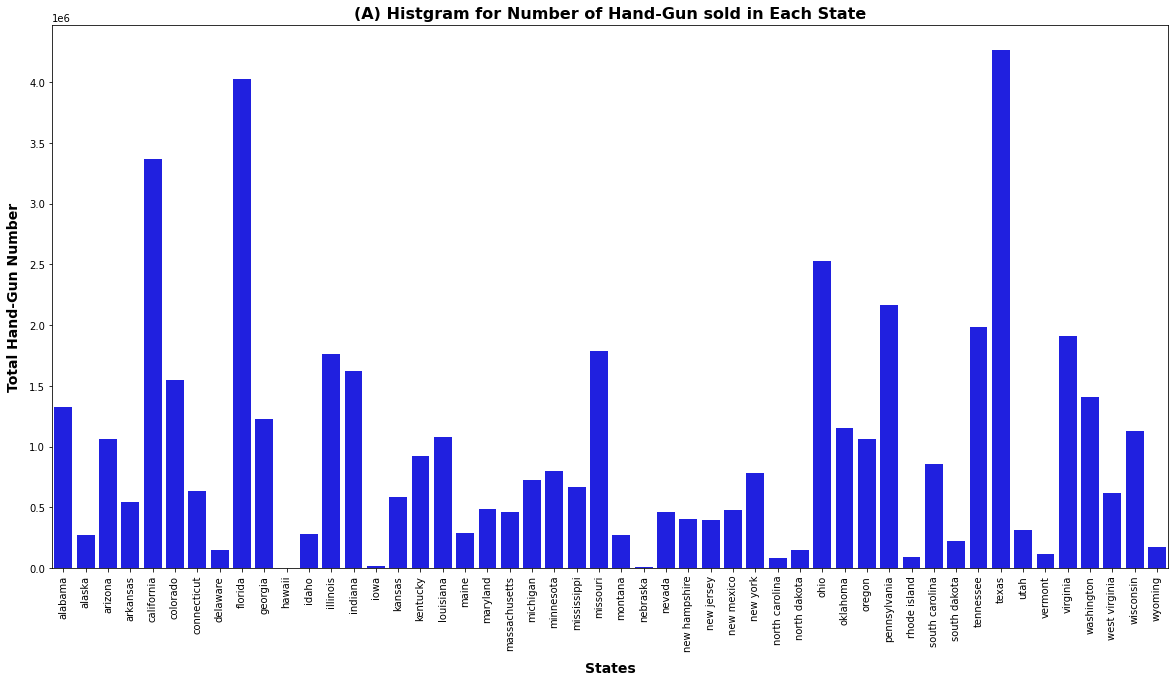

In [44]:
#ploting the state vs 3 types of guns

plt.pyplot.figure(figsize=(20,10))
sns.barplot(x=state_names, y=handgun, color='blue')
plt.pyplot.xticks(rotation=90)

plt.pyplot.title('(A) Histgram for Number of Hand-Gun sold in Each State', fontweight='bold', fontsize=16)
plt.pyplot.xlabel('States', labelpad=10, fontweight='bold', fontsize=14)
plt.pyplot.ylabel('Total Hand-Gun Number', labelpad=8, fontweight='bold', fontsize=14)

>for the HAND-GUN the TEXAS were the highest in selling this type of guns, and both of FLORIDA & CALIFORNIA were equal in selling the number of this gun.

Text(0, 0.5, 'Total Long-Gun Number')

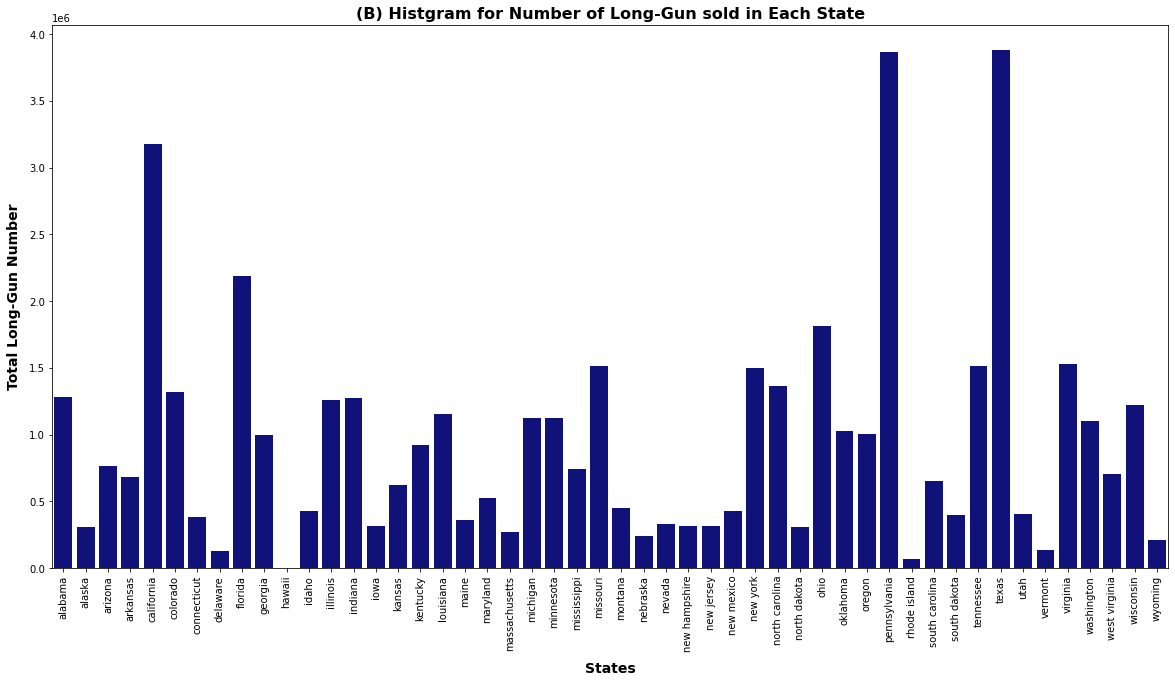

In [45]:
#ploting the state vs longgun

plt.pyplot.figure(figsize=(20,10))
sns.barplot(x=state_names, y=longgun, color='darkblue')
plt.pyplot.xticks(rotation=90)

plt.pyplot.title('(B) Histgram for Number of Long-Gun sold in Each State', fontweight='bold', fontsize=16)
plt.pyplot.xlabel('States', labelpad=10, fontweight='bold', fontsize=14)
plt.pyplot.ylabel('Total Long-Gun Number', labelpad=8, fontweight='bold', fontsize=14)

>PENNSYLVANIA state, TEXAS, and CALIFORNIA all of them are the highest in selling the LOGN-GUN type, as each one of them were considered in First, Second, and Third in highest rank respectively.

Text(0, 0.5, 'Total Other-Gun Number')

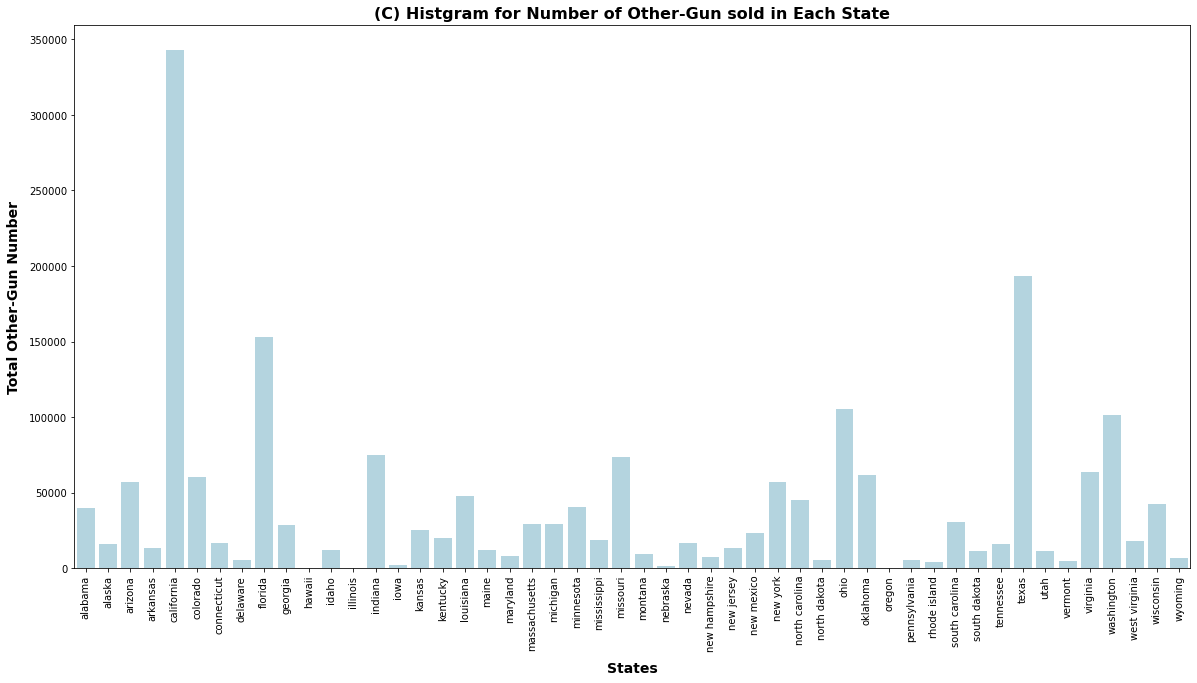

In [46]:
#ploting the state vs other

plt.pyplot.figure(figsize=(20,10))
sns.barplot(x=state_names, y=other, color='lightblue')
plt.pyplot.xticks(rotation=90)

plt.pyplot.title('(C) Histgram for Number of Other-Gun sold in Each State', fontweight='bold', fontsize=16)
plt.pyplot.xlabel('States', labelpad=10, fontweight='bold', fontsize=14)
plt.pyplot.ylabel('Total Other-Gun Number', labelpad=8, fontweight='bold', fontsize=14)

>the OTHER types of guns were significantly shown in the highes number at CALIFORNIA state, TEXAS came in second, and FLORIDA came in third rank

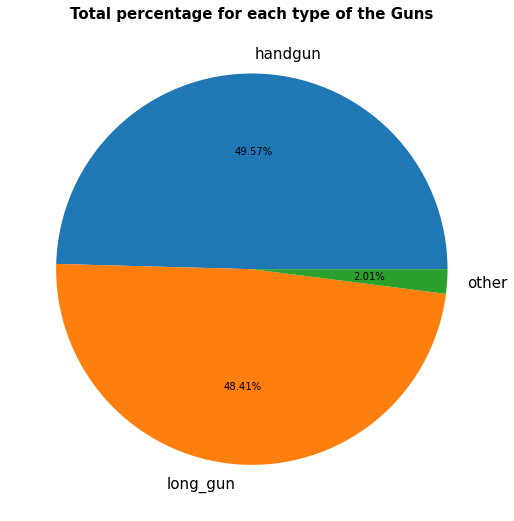

In [47]:
gun_types = gun_df[['handgun', 'long_gun', 'other']].sum()

plt.pyplot.figure(figsize=(9, 9))
plt.pyplot.rcParams['xtick.labelsize']=15
plt.pyplot.rcParams['ytick.labelsize']=15

plt.pyplot.pie(gun_types, labels = gun_types.index, autopct='%1.2f%%')
plt.pyplot.title("Total percentage for each type of the Guns",fontweight='bold', fontsize=15);

>the OTHER-GUN types is weakly shwon in the pie-chart, and the LONG-GUN type were holding the highest number of being sold in big amount. 

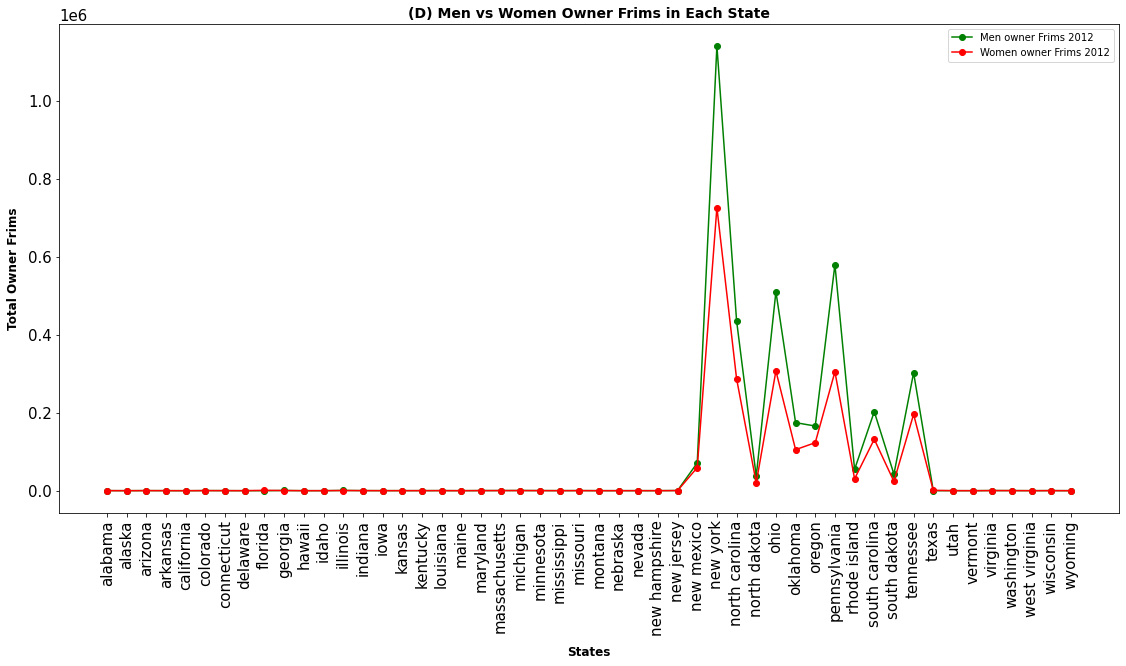

In [48]:
#reference: https://stackoverflow.com/questions/42767489/add-legend-to-seaborn-point-plot

plt.pyplot.figure(figsize=(19,9))
ax = plt.pyplot.gca()

ax.plot_date(us_df.states, us_df['men owner frims 2012'], color="green", label="Men owner Frims 2012", linestyle="-")
ax.plot_date(us_df.states, us_df['women owner frims 2012'], color="red", label="Women owner Frims 2012", linestyle="-")

plt.pyplot.xticks(rotation=90)
plt.pyplot.title('(D) Men vs Women Owner Frims in Each State', fontweight='bold', fontsize=14)
plt.pyplot.xlabel('States', labelpad=10, fontweight='bold', fontsize=12)
plt.pyplot.ylabel('Total Owner Frims', labelpad=8, fontweight='bold', fontsize=12)
ax.legend()

>The Men owner Frims show higher values than Women owner Frims especially in New York, Pennsylvania, Ohio, Tennessee, and South Carolina respectively.

<a id='conclusions'></a>
## Conclusions

>**Results**: Our data suggest that:
    >* Most of the states were not given permits for guns and the highest one is only KENTUCKY state.
    >* each type of gun ( hand, long, and other guns) were varied between each state but the most sold one was the HandGun type.
 >* Men and women owning Firms in different states, New York where the highest values especially from Men gender.

>**Limitations**: There are a couple of limitations with our data:
     >* Both of the datasets were useful in visualizing the usage and selling the guns in the USA's states.
     >* However, cleaning the data and extracting the used data only were slightly diffecult espicalliy for US_CENSUS_DF as most of it is data were collected in rows.


In [49]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_FBI_Gun_dataset.ipynb'])

1